In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler, MinMaxScaler

### two way for load the data

In [4]:
# data = pd.read_csv('data.csv')

In [13]:
data = load_breast_cancer()
X = data.data
y = data.y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

####  در درخت تصمیم نیازی به نرمال سازی نیست

In [14]:
# scaler_x = MinMaxScaler().fit(X_train)
# X_train, X_test = scaler_x.transform(X_train), scaler_x.transform(X_test)

## model

In [15]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train)

DecisionTreeClassifier()

### DRAW decision tree

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(0.6647727272727273, 0.9285714285714286, 'x[22] <= 105.95\ngini = 0.463\nsamples = 398\nvalue = [145, 253]'),
 Text(0.42045454545454547, 0.7857142857142857, 'x[27] <= 0.142\ngini = 0.113\nsamples = 250\nvalue = [15, 235]'),
 Text(0.29545454545454547, 0.6428571428571429, 'x[13] <= 48.975\ngini = 0.034\nsamples = 234\nvalue = [4, 230]'),
 Text(0.18181818181818182, 0.5, 'x[20] <= 15.77\ngini = 0.026\nsamples = 231\nvalue = [3, 228]'),
 Text(0.09090909090909091, 0.35714285714285715, 'x[21] <= 32.765\ngini = 0.009\nsamples = 219\nvalue = [1, 218]'),
 Text(0.045454545454545456, 0.21428571428571427, 'gini = 0.0\nsamples = 201\nvalue = [0, 201]'),
 Text(0.13636363636363635, 0.21428571428571427, 'x[21] <= 33.8\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(0.09090909090909091, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.18181818181818182, 0.07142857142857142, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.2727272727272727, 0.35714285714285715, 'x[

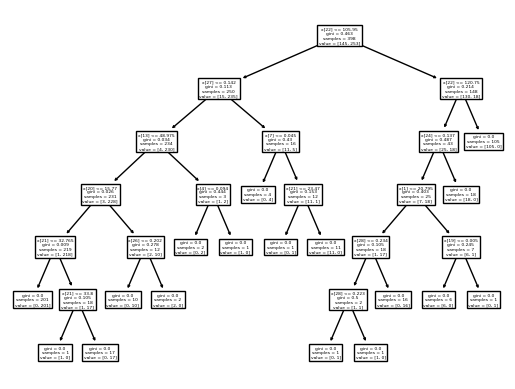

In [17]:
tree.plot_tree(model)

In [22]:
y_pre = model.predict(X_test)
confusion_matrix(y_pre, y_test).T

array([[65,  2],
       [ 8, 96]], dtype=int64)

### pre pruning

In [30]:
model = DecisionTreeClassifier(criterion='gini',min_samples_split = 30 ,min_samples_leaf = 20)
model.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20, min_samples_split=30)

[Text(0.6, 0.9, 'x[22] <= 105.95\ngini = 0.463\nsamples = 398\nvalue = [145, 253]'),
 Text(0.4, 0.7, 'x[27] <= 0.135\ngini = 0.113\nsamples = 250\nvalue = [15, 235]'),
 Text(0.3, 0.5, 'x[21] <= 29.985\ngini = 0.026\nsamples = 230\nvalue = [3, 227]'),
 Text(0.2, 0.3, 'x[10] <= 0.409\ngini = 0.01\nsamples = 198\nvalue = [1, 197]'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 178\nvalue = [0, 178]'),
 Text(0.3, 0.1, 'gini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.4, 0.3, 'gini = 0.117\nsamples = 32\nvalue = [2, 30]'),
 Text(0.5, 0.5, 'gini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.8, 0.7, 'x[22] <= 120.75\ngini = 0.214\nsamples = 148\nvalue = [130, 18]'),
 Text(0.7, 0.5, 'x[1] <= 19.545\ngini = 0.487\nsamples = 43\nvalue = [25, 18]'),
 Text(0.6, 0.3, 'gini = 0.397\nsamples = 22\nvalue = [6, 16]'),
 Text(0.8, 0.3, 'gini = 0.172\nsamples = 21\nvalue = [19, 2]'),
 Text(0.9, 0.5, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]')]

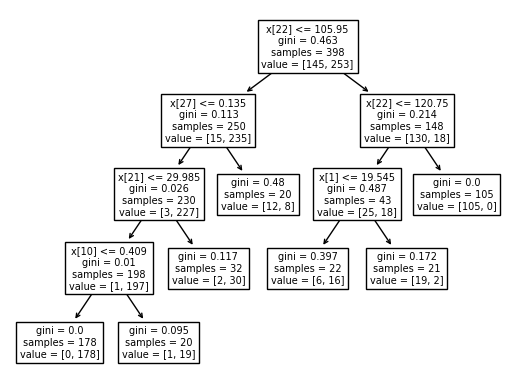

In [31]:
tree.plot_tree(model)

In [32]:
y_pre = model.predict(X_test)
confusion_matrix(y_pre, y_test).T

array([[63,  4],
       [ 9, 95]], dtype=int64)

### feature_selection

In [40]:
index = model.feature_importances_
print(index)

[0.00000000e+00 5.47616560e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.73516765e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.16006163e-03 8.62622932e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.08818337e-02
 0.00000000e+00 0.00000000e+00]


# post pruning
#### Greater values of ccp_alpha increase the number of nodes pruned
##### To get an idea of what values of ccp_alpha could be appropriate,
##### scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that
##### returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process.

In [42]:
model = DecisionTreeClassifier(criterion='gini')
# model.fit(X_train,y_train)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [43]:
ccp_alphas

array([0.        , 0.00237298, 0.00250109, 0.00335008, 0.00380155,
       0.00430725, 0.00460637, 0.0126675 , 0.01627343, 0.02706234,
       0.0338235 , 0.31287717])

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

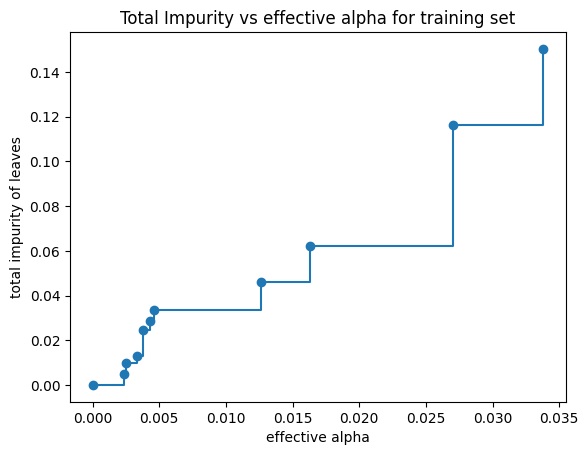

In [45]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

## Accuracy vs alpha for training and testing sets

In [47]:
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    model.fit(X_train,y_train)
    models.append(model)

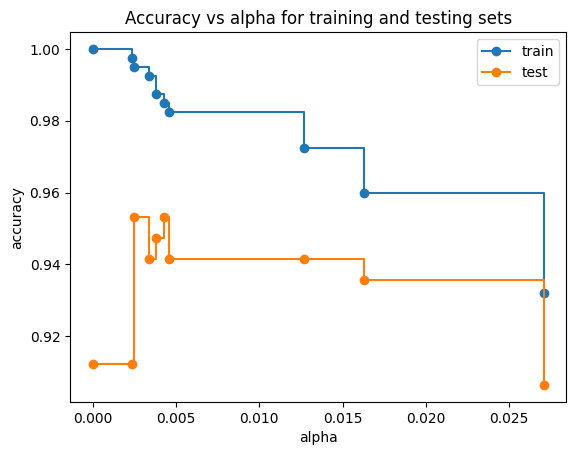

In [50]:
train_scores = [model.score(X_train, y_train) for model in models]
test_scores = [model.score(X_test, y_test) for model in models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[:-2], train_scores[:-2], marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[:-2], test_scores[:-2], marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier,
the tree overfits, leading to a 100% training accuracy and 91% testing accuracy.

In this example, setting ccp_alpha=0.003 maximizes the testing accuracy.

In [64]:
model = DecisionTreeClassifier(ccp_alpha=0.003)
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
confusion_matrix(y_pre, y_test).T


array([[63,  4],
       [ 6, 98]], dtype=int64)

In [65]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))


0.9949748743718593
0.9415204678362573


[Text(0.625, 0.9166666666666666, 'x[22] <= 105.95\ngini = 0.463\nsamples = 398\nvalue = [145, 253]'),
 Text(0.3611111111111111, 0.75, 'x[27] <= 0.142\ngini = 0.113\nsamples = 250\nvalue = [15, 235]'),
 Text(0.2222222222222222, 0.5833333333333334, 'x[13] <= 48.975\ngini = 0.034\nsamples = 234\nvalue = [4, 230]'),
 Text(0.1111111111111111, 0.4166666666666667, 'x[20] <= 15.77\ngini = 0.026\nsamples = 231\nvalue = [3, 228]'),
 Text(0.05555555555555555, 0.25, 'gini = 0.009\nsamples = 219\nvalue = [1, 218]'),
 Text(0.16666666666666666, 0.25, 'x[21] <= 29.68\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.2222222222222222, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[24] <= 0.107\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2777777777777778, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3888888888888889, 

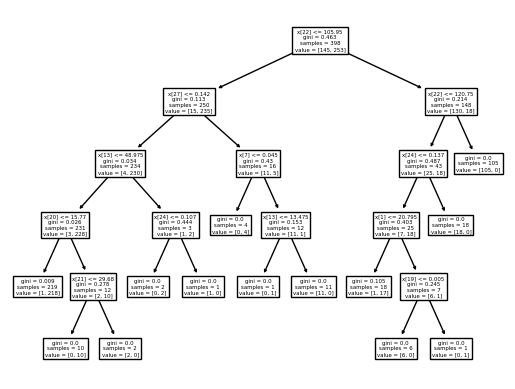

In [66]:
tree.plot_tree(model)